In [ ]:
# ler todos os originais

In [ ]:
# preprocessar o pgn, removendo a numeracao e transformando em 
# array de words

In [1]:
import numpy as np
from IPython.display import clear_output, display

from glob import glob
import os
import os.path
from os import path

import shutil

import cv2
import PIL

import re

In [8]:
from pathlib import Path

In [15]:
from matplotlib import pyplot as plt

In [2]:
BASE_DIR= '/Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets'
ORG_DIR= path.join( BASE_DIR, 'original_clean', 'images')

In [83]:
pad= 10

In [3]:
#executa o processamento para cada arquivo
filenames= glob( os.path.join( ORG_DIR, "*.jpg"))

In [4]:
print( len( filenames))

687


In [5]:
print( filenames[0])

/Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0219.jpg


In [ ]:
#le os arquivos de imagens

In [6]:
def read_text_file( filename):
    f= open( filename, 'r')
    d= f.read()
    f.close()
    return d

In [17]:
def show( img):
    plt.imshow( img)
    plt.title( 'picture')
    plt.show()

In [39]:
#le imagem e label para 
def read_original( original_image_file):
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( original_image_file).name

    img= cv2.imread( original_image_file)
    label= read_text_file( 
        path.join( Path( original_image_file).parent, 
                  "..", 
                  "labels",
                  filename[0:-3]+"pgn"
                 )
    )
    return img, line_to_words( label)

img, label= read_original( filenames[0])

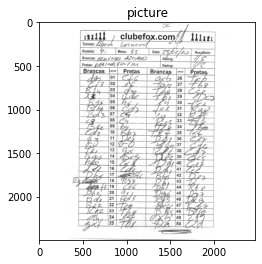

In [18]:
show( img)

In [40]:
label

array(['d4', 'Nf6', 'Nf3', 'e6', 'Bf4', 'd5', 'e3', 'Bd6', 'Bg5', 'h6',
       'Bh4', 'Nbd7', 'Bd3', 'c5', 'c3', 'c4', 'Bc2', 'b5', 'Nbd2', 'Bb7',
       'a3', 'Qe7', 'O-O', 'O-O', 'Re1', 'g5', 'Bg3', 'Bxg3', 'hxg3',
       'Ne4', 'Nxe4', 'dxe4', 'Nd2', 'f5', 'Qh5', 'Kg7', 'f3', 'Nf6',
       'Qh2', 'a5', 'Bd1', 'Bd5', 'Be2', 'Rfc8', 'Kf2', 'Rh8', 'a4',
       'exf3', 'gxf3', 'Rab8', 'axb5', 'Rxb5', 'Ra2', 'Rhb8', 'Raa1',
       'Ne8', 'Rab1', 'Qc7', 'e4', 'fxe4', 'fxe4', 'Ba8', 'e5', 'Bd5',
       'Ke3'], dtype='<U4')

In [29]:
def filter_numeros( line):
    return re.sub( r"\d+\.", '', line)

In [30]:
filter_numeros( label)

'd4 Nf6 Nf3 e6 Bf4 d5 e3 Bd6 Bg5 h6 Bh4 Nbd7 Bd3 c5 c3 c4 Bc2 b5 Nbd2 Bb7 a3 Qe7 O-O O-O Re1 g5 Bg3 Bxg3 hxg3 Ne4 Nxe4 dxe4 Nd2 f5 Qh5 Kg7 f3 Nf6 Qh2 a5 Bd1 Bd5 Be2 Rfc8 Kf2 Rh8 a4 exf3 gxf3 Rab8 axb5 Rxb5 Ra2 Rhb8 Raa1 Ne8 Rab1 Qc7 e4 fxe4 fxe4 Ba8 e5 Bd5 Ke3'

In [20]:
def filter_chaves( s):
    _in= False
    r= []
    for x in s:
        if _in:
            if x== '}':
                _in= False
            continue

        #not in
        if x== '{':
            _in= True
            continue
            
        #not in & x!= '{'
        r.append( x)
    return ''.join(r)

filter_chaves( 'jdflkasjd{djklsafd} dfasdjf f{dkjfl}jk {}x)')



'jdflkasjd dfasdjf fjk x)'

In [24]:
def lines_to_words( all_lines):
    #filtered= [re.split( r'###', line)[1].lstrip().rstrip() for line in all_lines]
    filtered= [line.lstrip().rstrip() for line in all_lines]
    filtered= [filter_chaves( line) for line in filtered]
    filtered= [filter_numeros( line) for line in filtered]
    filtered= [line.split() for line in filtered]
    all_words= np.concatenate( filtered)   # matriz para vetor..
    return all_words
    
    #unique, counts= np.unique( all_words, return_counts= True)
    #words= np.asarray( (unique, counts)).T
    #return words

In [25]:
def line_to_words( line):
    return lines_to_words([line])

In [49]:
#words= line_to_words( label)

AttributeError: 'numpy.ndarray' object has no attribute 'lstrip'

In [36]:
len( words)

65

In [97]:
def write_text_file( filename, data):
    f= open( filename, "w")
    f.write( data)
    f.close()
    #print( "Write text to "+ filename)

In [85]:
def crop_only( img, y, h, x, w):
    crop_img= img[ y:y+h, x:x+w]
    return crop_img

In [124]:
# 1. Gerar recorte de 8 linhas, tirando a coluna do meio e salvar 
# em 8lines. Nomear como "carnaval_0001_line1_8"
def do_crop_8lines( img):
    crop_img= crop_only( img, 599-pad, 560+2*pad, 467, 774)
    final_img= np.concatenate((
        crop_only( crop_img, 0, crop_img.shape[0], 0, 339), 
        crop_only( crop_img, 0, crop_img.shape[0], 339+96, 339)
    ), axis=1)
    return final_img

def extract_8lines_image( img):
    return do_crop_8lines( img)

def generate_8lines( img, words, image_fullpath):
    if len( words)< 16:
        print( "Menos de 16 movimentos. Skip..")
        return None
    
    folder= path.join( BASE_DIR, "carnaval_8lines")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    # define nome
    new_name= "carnaval_"+filename[18:22]+ "_line_1_8"
    new_image_file= path.join( folder, "images", new_name+ '.jpg')
    new_label_file= path.join( folder, "labels", new_name+ '.pgn')
    
    new_img= extract_8lines_image( img)  #TODO: extrair imagem
    new_pgn= " ".join( words[0:16])  #TODO: extrair texto
    
    # escreve arquivo
    cv2.imwrite( new_image_file, new_img)
    #print( "Write image to  "+ new_image_file)
    write_text_file( new_label_file, new_pgn)
    
    return new_img

In [95]:
def crop_4lines( img_crop8):
    #primeiras 4 linhas
    return crop_only( img_crop8, 0, 70*4+2*pad, 0, img_crop8.shape[1])

# 2. Gerar recorte de 4 linhas (1_4), a partir do recorte de 
# 8 e gerar os arquivos. Nomear como "carnaval_0001_line1_4"
def generate_4lines( img_crop8, words, image_fullpath):
    if len( words)< 8:
        return
    
    folder= path.join( BASE_DIR, "carnaval_4lines")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    # define nome
    new_name= "carnaval_"+filename[18:22]+ "_line_1_4"
    new_image_file= path.join( folder, "images", new_name+ '.jpg')
    new_label_file= path.join( folder, "labels", new_name+ '.pgn')
    
    new_img= crop_4lines( img_crop8)  #TODO: extrair imagem
    new_pgn= " ".join( words[0:8])  #TODO: extrair texto
    
    # escreve arquivo
    cv2.imwrite( new_image_file, new_img)
    #print( "Write image to  "+ new_image_file)
    write_text_file( new_label_file, new_pgn)
    
    return new_img

In [94]:
# 3. Gerar rocorte de 2 linhas, para cada sequencia de 2 linhas, nomeando
# como line1_2, line2_3, line3_4, line4_5, .. "carnaval_0001_line1_2"
def crop_2lines( img_crop8, linha=0):
    #linha: 0, 1, 2... 6   
    y= linha*70
    return crop_only( img_crop8, y, 70*2+2*pad, 0, img_crop8.shape[1])

# 2. Gerar recorte de 4 linhas (1_4), a partir do recorte de 
# 8 e gerar os arquivos. Nomear como "carnaval_0001_line1_4"
def generate_2lines( img_crop8, words, image_fullpath):
    if len( words)< 8:
        return
    
    folder= path.join( BASE_DIR, "carnaval_2lines")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    #0,1,..6
    for linha in range(0,7):
    
        # define nome
        new_name= "carnaval_"+filename[18:22]+ "_line_"+str(linha+1)+"_"+ str(linha+3)
        new_image_file= path.join( folder, "images", new_name+ '.jpg')
        new_label_file= path.join( folder, "labels", new_name+ '.pgn')

        new_img= crop_2lines( img_crop8, linha)  #TODO: extrair imagem
        new_pgn= " ".join( words[linha*2:linha*2+4])  #TODO: extrair texto

        # escreve arquivo
        cv2.imwrite( new_image_file, new_img)
        #print( "Write image to  "+ new_image_file)
        write_text_file( new_label_file, new_pgn)

In [93]:
# 4. Gerar recorte de 1 linhas, para cada linhas nomeando como 
# line_1, line_2. "carnaval_0001_line1"
# 3. Gerar rocorte de 2 linhas, para cada sequencia de 2 linhas, nomeando
# como line1_2, line2_3, line3_4, line4_5, .. "carnaval_0001_line1_2"
def crop_1_line( img_crop8, linha=0):
    #linha: 0, 1, 2... 7   
    y= linha*70
    return crop_only( img_crop8, y, 70+2*pad, 0, img_crop8.shape[1])

# 2. Gerar recorte de 4 linhas (1_4), a partir do recorte de 
# 8 e gerar os arquivos. Nomear como "carnaval_0001_line1_4"
def generate_1line( img_crop8, words, image_fullpath):
    if len( words)< 8:
        return
    
    folder= path.join( BASE_DIR, "carnaval_1line")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    #0,1,..7
    for linha in range(0,8):
    
        # define nome
        new_name= "carnaval_"+filename[18:22]+ "_line_"+str(linha+1)
        new_image_file= path.join( folder, "images", new_name+ '.jpg')
        new_label_file= path.join( folder, "labels", new_name+ '.pgn')

        new_img= crop_1_line( img_crop8, linha)  #TODO: extrair imagem
        new_pgn= " ".join( words[linha*2:linha*2+2])  #TODO: extrair texto

        # escreve arquivo
        cv2.imwrite( new_image_file, new_img)
        #print( "Write image to  "+ new_image_file)
        write_text_file( new_label_file, new_pgn)


In [92]:
# 5. Gerar recorte de 1 word, para todas as linhas, nomeando como 
# word_1, word_2, word_.... "carnaval_0001_word1"

# 4. Gerar recorte de 1 linhas, para cada linhas nomeando como 
# line_1, line_2. "carnaval_0001_line1"
# 3. Gerar rocorte de 2 linhas, para cada sequencia de 2 linhas, nomeando
# como line1_2, line2_3, line3_4, line4_5, .. "carnaval_0001_line1_2"
def crop_1word( img_crop8, linha, coluna):
    #linha: 0, 1, ...7
    #coluna: 0, 1
    y= linha*70
    x= coluna*339
    return crop_only( img_crop8, y, 70+2*pad, x, 339)

# 2. Gerar recorte de 4 linhas (1_4), a partir do recorte de 
# 8 e gerar os arquivos. Nomear como "carnaval_0001_line1_4"
def generate_1word( img_crop8, words, image_fullpath):
    if len( words)< 16:
        return
    
    folder= path.join( BASE_DIR, "carnaval_1word")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    #0,1,..7
    word= 0
    for linha in range(0,8):
        #0,1,..7
        for coluna in [0,1]:
    
            # define nome
            new_name= "carnaval_"+filename[18:22]+ "_word_"+str(word+1)
            new_image_file= path.join( folder, "images", new_name+ '.jpg')
            new_label_file= path.join( folder, "labels", new_name+ '.pgn')

            new_img= crop_1word( img_crop8, linha, coluna)  #TODO: extrair imagem
            new_pgn= words[word]  #TODO: extrair texto

            # escreve arquivo
            cv2.imwrite( new_image_file, new_img)
            #print( "Write image to  "+ new_image_file)
            write_text_file( new_label_file, new_pgn)
            word= word+1


In [100]:
len( filenames)

687

In [128]:
#TODO: adicionar padding vertical nas imagens

def generate_all( filenames):
    total= len( filenames)
    count= 1
    for f in filenames:
        print( "Processando "+ f+"..."+ str(count)+"/"+str(total))
        img, words= read_original( f)
        #print( words[0:10])
        #print( img.shape)
        #show( img)

        if len( words)< 16:
            print( "NAO TEM 16 MOVIMENTOS. SKIP..")
            continue
        
        img_8crop= generate_8lines( img, words, f)
        #show( img_8crop)
        
        #generate 4 lines
        generate_4lines( img_8crop, words, f)
        #generate 2 lines
        generate_2lines( img_8crop, words, f)
        #generate 1 line
        generate_1line( img_8crop, words, f)
        #generate 1 word
        generate_1word( img_8crop, words, f)
        count= count+1


generate_all( filenames)

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0219.jpg...1/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0225.jpg...2/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0543.jpg...3/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0557.jpg...4/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0231.jpg...5/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0580.jpg...6/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0594.jpg...7/687
Processando /Users/hayashi/

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0150.jpg...59/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0636.jpg...60/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0187.jpg...61/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0193.jpg...62/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0408.jpg...63/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0346.jpg...64/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0420.jpg...65/687
NAO TEM 16 MOVIMENTO

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0395.jpg...117/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0381.jpg...118/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0418.jpg...119/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0356.jpg...120/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0430.jpg...121/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0424.jpg...122/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0342.jpg...123/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0631.jpg...177/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0037.jpg...178/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0023.jpg...179/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0590.jpg...180/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0584.jpg...181/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0209.jpg...182/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0235.jpg...183/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0509.jpg...236/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0279.jpg...237/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0537.jpg...238/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0251.jpg...239/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0245.jpg...240/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0523.jpg...241/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0292.jpg...242/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0081.jpg...295/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0644.jpg...296/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0122.jpg...297/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0136.jpg...298/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0650.jpg...299/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0678.jpg...300/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0687.jpg...301/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0323.jpg...354/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0479.jpg...355/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0492.jpg...356/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0486.jpg...357/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0487.jpg...358/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0493.jpg...359/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0478.jpg...360/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0064.jpg...413/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0058.jpg...414/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0299.jpg...415/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0272.jpg...416/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0514.jpg...417/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0500.jpg...418/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0266.jpg...419/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0301.jpg...471/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0467.jpg...472/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0473.jpg...473/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0315.jpg...474/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0329.jpg...475/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0498.jpg...476/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0499.jpg...477/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0511.jpg...530/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0277.jpg...531/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0263.jpg...532/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0505.jpg...533/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0238.jpg...534/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0204.jpg...535/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0562.jpg...536/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0398.jpg...590/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0399.jpg...591/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0414.jpg...592/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0372.jpg...593/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0366.jpg...594/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0400.jpg...595/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0428.jpg...596/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0215.jpg...649/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0573.jpg...650/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0229.jpg...651/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0598.jpg...652/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0003.jpg...653/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0017.jpg...654/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0177.jpg...655/687
Processando /

In [117]:
# 1. Gerar recorte de 8 linhas, tirando a coluna do meio e salvar 
# em 8lines. Nomear como "carnaval_0001_line1_8"
def do_crop_full( img):
    return crop_only( img, 570, 1800, 440, 1585)
    
def generate_fullpage( img, words, image_fullpath):
    
    folder= path.join( BASE_DIR, "carnaval_fullpage")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    # define nome
    new_name= "carnaval_"+filename[18:22]+ "_fullpage"
    new_image_file= path.join( folder, "images", new_name+ '.jpg')
    new_label_file= path.join( folder, "labels", new_name+ '.pgn')
    
    new_img= do_crop_full( img)  #TODO: extrair imagem
    new_pgn= " ".join( words)  #TODO: extrair texto
    
    # escreve arquivo
    cv2.imwrite( new_image_file, new_img)
    #print( "Write image to  "+ new_image_file)
    write_text_file( new_label_file, new_pgn)
    
    return new_img

In [118]:
def generate_all_full( filenames):
    total= len( filenames)
    count= 1
    for f in filenames:
        print( "Processando "+ f+"..."+ str(count)+"/"+str(total))
        img, words= read_original( f)

        if len( words)< 16:
            print( "NAO TEM 16 MOVIMENTOS. SKIP..")
            continue
        
        img_8crop= generate_fullpage( img, words, f)
        count= count+1


generate_all_full( filenames)

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0219.jpg...1/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0225.jpg...2/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0543.jpg...3/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0557.jpg...4/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0231.jpg...5/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0580.jpg...6/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0594.jpg...7/687
Processando /Users/hayashi/

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0150.jpg...59/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0636.jpg...60/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0187.jpg...61/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0193.jpg...62/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0408.jpg...63/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0346.jpg...64/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0420.jpg...65/687
NAO TEM 16 MOVIMENTO

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0381.jpg...118/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0418.jpg...119/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0356.jpg...120/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0430.jpg...121/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0424.jpg...122/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0342.jpg...123/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0197.jpg...124/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0037.jpg...178/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0023.jpg...179/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0590.jpg...180/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0584.jpg...181/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0209.jpg...182/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0235.jpg...183/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0553.jpg...184/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0279.jpg...237/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0537.jpg...238/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0251.jpg...239/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0245.jpg...240/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0523.jpg...241/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0292.jpg...242/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0286.jpg...243/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0122.jpg...297/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0136.jpg...298/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0650.jpg...299/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0678.jpg...300/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0687.jpg...301/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0320.jpg...302/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0446.jpg...303/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0492.jpg...356/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0486.jpg...357/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0487.jpg...358/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0493.jpg...359/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0478.jpg...360/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0444.jpg...361/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0322.jpg...362/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0299.jpg...415/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0272.jpg...416/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0514.jpg...417/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0500.jpg...418/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0266.jpg...419/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0528.jpg...420/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0258.jpg...421/687
NAO TEM 16 MO

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0467.jpg...472/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0473.jpg...473/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0315.jpg...474/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0329.jpg...475/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0498.jpg...476/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0499.jpg...477/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0328.jpg...478/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0277.jpg...531/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0263.jpg...532/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0505.jpg...533/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0238.jpg...534/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0204.jpg...535/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0562.jpg...536/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0576.jpg...537/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0399.jpg...591/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0414.jpg...592/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0372.jpg...593/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0366.jpg...594/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0400.jpg...595/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0428.jpg...596/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0170.jpg...597/687
Processando /

Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0229.jpg...651/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0598.jpg...652/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0003.jpg...653/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0017.jpg...654/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0177.jpg...655/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0611.jpg...656/687
Processando /Users/hayashi/mestrado/datasets/score_sheet/aberto_carnaval/datasets/original_clean/images/carnaval_original_0605.jpg...657/687
Processando /